# Build a scoring model

### Missions:
- Transform the relevant variables for a classic supervised model (= feature engineering)
- Train a classic supervised model that meets the expectations of the trades
- Evaluate the performance of a classic supervised model
- Adapt the hyperparameters of a classic supervised learning model in order to improve it

### Dataset from : https://www.kaggle.com/c/home-credit-default-risk/data

### Interesting Kaggle :
- https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
- https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering
- https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import decomposition

from functions import *

In [2]:
pd.set_option('display.max_columns', None)  

In [3]:
application_train_data = pd.read_csv('application_train.csv', sep=',')
application_train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# 1.Feature engineering

## Cleaning and testing dataset : Application_train.csv

### Size of dataset

In [4]:
application_train_data.shape

(307511, 122)

In [5]:
for index,column in enumerate(application_train_data.columns):
        print(index,column)  

0 SK_ID_CURR
1 TARGET
2 NAME_CONTRACT_TYPE
3 CODE_GENDER
4 FLAG_OWN_CAR
5 FLAG_OWN_REALTY
6 CNT_CHILDREN
7 AMT_INCOME_TOTAL
8 AMT_CREDIT
9 AMT_ANNUITY
10 AMT_GOODS_PRICE
11 NAME_TYPE_SUITE
12 NAME_INCOME_TYPE
13 NAME_EDUCATION_TYPE
14 NAME_FAMILY_STATUS
15 NAME_HOUSING_TYPE
16 REGION_POPULATION_RELATIVE
17 DAYS_BIRTH
18 DAYS_EMPLOYED
19 DAYS_REGISTRATION
20 DAYS_ID_PUBLISH
21 OWN_CAR_AGE
22 FLAG_MOBIL
23 FLAG_EMP_PHONE
24 FLAG_WORK_PHONE
25 FLAG_CONT_MOBILE
26 FLAG_PHONE
27 FLAG_EMAIL
28 OCCUPATION_TYPE
29 CNT_FAM_MEMBERS
30 REGION_RATING_CLIENT
31 REGION_RATING_CLIENT_W_CITY
32 WEEKDAY_APPR_PROCESS_START
33 HOUR_APPR_PROCESS_START
34 REG_REGION_NOT_LIVE_REGION
35 REG_REGION_NOT_WORK_REGION
36 LIVE_REGION_NOT_WORK_REGION
37 REG_CITY_NOT_LIVE_CITY
38 REG_CITY_NOT_WORK_CITY
39 LIVE_CITY_NOT_WORK_CITY
40 ORGANIZATION_TYPE
41 EXT_SOURCE_1
42 EXT_SOURCE_2
43 EXT_SOURCE_3
44 APARTMENTS_AVG
45 BASEMENTAREA_AVG
46 YEARS_BEGINEXPLUATATION_AVG
47 YEARS_BUILD_AVG
48 COMMONAREA_AVG
49 ELEVATORS_AV

### Deleting empty (or not filled enough) columns

In [6]:
def showMissingValues(data, thresh=20, color='black', edgecolor='black', width=15, height=3):
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Percent of missing values per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Column with more than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Column with less than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='blue',
         ha='left' ,va='top')
    plt.xlabel('Column', size=15, weight='bold')
    plt.ylabel('Percent of missing values', weight='bold')
    plt.yticks(weight ='bold')
    
    return plt.show()

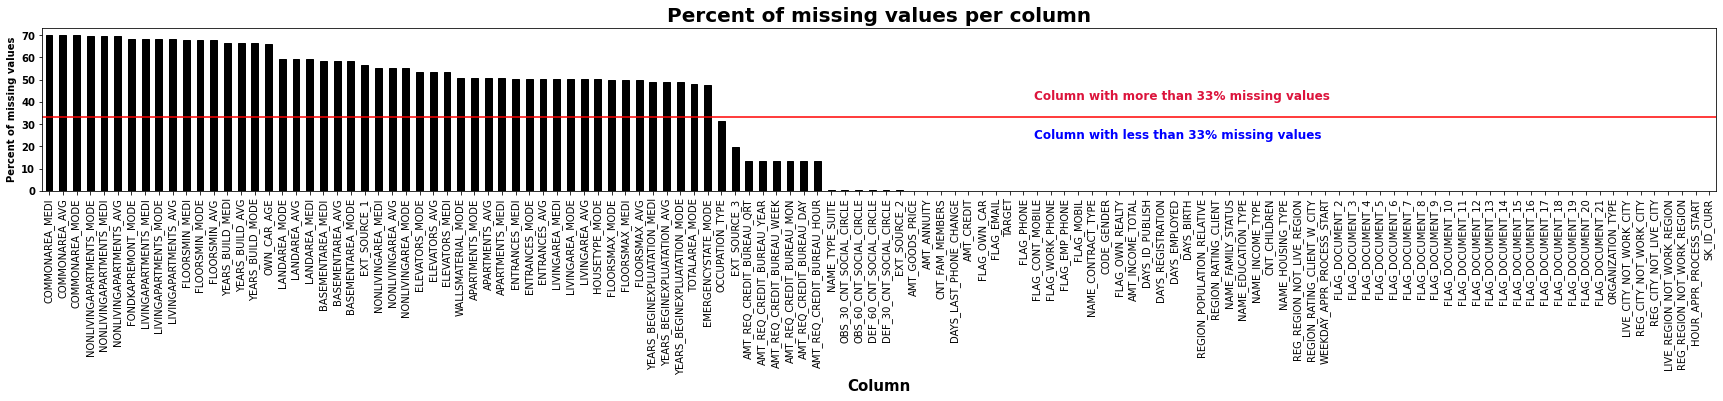

In [7]:
showMissingValues(application_train_data,33, width= 30)

In [8]:
application_train_data_filtered = application_train_data.copy()

for index,column in enumerate(application_train_data.columns):
        if(application_train_data[column].isnull().mean()*100 > 33):
            application_train_data_filtered = application_train_data_filtered.drop([column], axis=1)             

### Filling NaN with 0

In [9]:
application_train_data_filtered.fillna(0)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.000000,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.000000,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.000000,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,0.000000,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,0,1.0,2,2,MONDAY,8

### Transforming Categorical Data

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
application_train_data_filtered = application_train_data_filtered.apply(lambda col: labelencoder.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [11]:
application_train_data_filtered

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,1,0,1,0,1,0,1053,3266,3501,505,6,7,4,3,1,63,16921,8758,8631,1247,1,1,0,1,1,0,8,0,1,1,6,2,0,0,0,0,0,0,5,28032,287,12,2,12,2,151,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1374,1019,5978,46,1,4,1,1,1,11,6763,1596,2068,2123,1,1,0,1,1,0,3,8,0,0,1,3,0,0,0,0,0,0,39,85038,814,1,0,1,0,3582,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,1,1,1,1,0,2093,1182,11786,131,6,7,4,3,1,47,9044,4182,9312,1703,1,1,1,1,1,0,8,0,1,1,1,23,0,0,0,0,0,0,11,72790,677,0,0,0,0,3568,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,1,0,455,2901,4616,458,6,7,4,0,1,34,9003,5059,15503,1598,1,1,0,1,0,0,8,8,1,1,6,9,0,0,0,0,0,0,5,90518,814,12,0,12,0,3348,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,9,9,24,11,25
4,4,0,0,1,0,1,0,296,3717,2863,677,6,7,4,3,1,74,9930,5058,9369,2732,1,1,0,1,0,0,3,0,1,1,4,3,0,0,0,0,1,1,37,35980,814,0,0,0,0,120,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,307506,0,0,1,0,0,0,699,2659,4143,376,6,7,4,2,5,77,16787,4304,13973,1092,1,1,0,1,0,0,14,0,0,0,4,7,0,0,0,0,0,0,43,96815,814,0,0,0,0,1923,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5,9,9,24,11,25
307507,307507,0,0,0,0,1,0,2160,2727,572,376,6,3,4,5,1,72,10773,12573,9453,3435,1,0,0,1,1,0,18,0,1,1,1,22,0,0,0,0,0,0,57,11535,814,0,0,0,0,3772,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,9,9,24,11,25
307508,307508,0,0,0,0,1,0,662,4391,4683,730,6,7,1,2,1,16,4966,10472,12063,4613,1,1,0,1,0,1,10,0,2,2,4,23,0,0,0,0,1,1,39,69206,363,29,0,29,0,1011,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
307509,307509,1,0,0,0,1,0,813,3119,2486,476,6,1,4,1,1,19,1961,6999,7425,6092,1,1,0,1,0,0,8,8,1,1,6,23,0,0,0,1,1,0,3,65461,632,0,0,0,0,2468,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Analysis

In [14]:
x = application_train_data_filtered.astype(np.float64)
std_scaler = preprocessing.StandardScaler().fit(x)
x_scaled = std_scaler.transform(x)

In [25]:
n_comp = 50
pca = decomposition.PCA(n_components= n_comp)
pca.fit(x_scaled)

PCA(n_components=50)

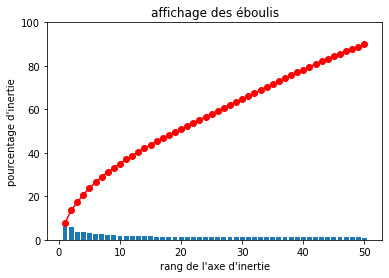

In [26]:
x_projected = pca.transform(x_scaled)

eboulis = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(eboulis))+1, eboulis)
plt.plot(np.arange(len(eboulis))+1, eboulis.cumsum(),c="red",marker='o')
plt.ylim(0,100)
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title('affichage des éboulis')
plt.show()

a faire

# Train a classic supervised model

In [11]:
from sklearn.model_selection import train_test_split

x = application_train_data_filtered.iloc[:,2:73]
y = application_train_data_filtered.iloc[:,1] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [12]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(x_train)
x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)

### Dummy Classifier

In [13]:
from sklearn.dummy import DummyClassifier

In [14]:
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(x_train_std, y_train)

dummy_clf.score(x_train_std, y_train)

0.5020530453144173

In [15]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(x_train_std, y_train)

dummy_clf.score(x_train_std, y_train)

0.851313558770861

In [16]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train_std, y_train)

dummy_clf.score(x_train_std, y_train)

0.9194000858506806

### SVM

In [24]:
from sklearn import svm

In [ ]:
classifier = svm.SVC(kernel='rbf', gamma=0.01)
classifier.fit(x_train_std, y_train)

In [ ]:
y_test_pred = classifier.decision_function(x_test_std)

from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_test_pred)
auc = metrics.auc(fpr, tpr)

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))


plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)


plt.legend(loc="lower right", fontsize=14)
plt.show()